In [0]:
import numpy as np
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
agent_data = pd.read_csv('/content/drive/My Drive/NYL_data/nyu_capstone_agent.csv')

In [0]:
pd.DataFrame(agent_data.Years_at_NYL.value_counts()).to_csv('agent_year.csv')

# Txt to csv

## masterdemographics

In [0]:
with open('/content/drive/My Drive/easi/masterdemographics.txt') as f:
  header = f.readline()
  lines = f.readlines()
header = header.replace('\n','')
header = header.strip().split('|')

In [0]:
lines_4 = [line.strip().split('|') for line in lines[600000:]]

In [0]:
masterdemographics_data_4 = pd.DataFrame(lines_4,columns = header)

In [0]:
masterdemographics_data_4.to_csv('/content/drive/My Drive/NYL_data/masterdemographics_data_4.csv')

# Data Processing

## Select wanted columns

In [0]:
household_cols = masterdemographics_data_1.columns[['household' in x for x in list(masterdemographics_data_1.columns)]]
race_cols = masterdemographics_data_1.columns[['race' in x for x in list(masterdemographics_data_1.columns)]]
heating_cols = masterdemographics_data_1.columns[['heating' in x for x in list(masterdemographics_data_1.columns)]]
asian_cols = masterdemographics_data_1.columns[['asian' in x for x in list(masterdemographics_data_1.columns)]]
veterans_cols = masterdemographics_data_1.columns[['veterans' in x for x in list(masterdemographics_data_1.columns)]]
hispanic_cols = masterdemographics_data_1.columns[['hispanic' in x for x in list(masterdemographics_data_1.columns)]]
white_cols = masterdemographics_data_1.columns[['white' in x for x in list(masterdemographics_data_1.columns)]]
black_cols = masterdemographics_data_1.columns[['black' in x for x in list(masterdemographics_data_1.columns)]]
native_cols = masterdemographics_data_1.columns[['native' in x for x in list(masterdemographics_data_1.columns)]]
ancestry_cols = masterdemographics_data_1.columns[['ancestry' in x for x in list(masterdemographics_data_1.columns)]]
citizenship_cols = masterdemographics_data_1.columns[['citizenship' in x for x in list(masterdemographics_data_1.columns)]]

NameError: ignored

In [0]:
pd.DataFrame(set(wanted_cols) - set(household_cols)- set(race_cols)- set(heating_cols)-set(asian_cols)- set(veterans_cols)- set(hispanic_cols)- set(white_cols)- set(black_cols)- set(native_cols) - set (ancestry_cols)).to_csv('wanted.csv')

## Concat dataset

In [0]:
wanted_cols = pd.read_csv('/content/drive/My Drive/NYL_data/wanted_cols.csv')
wanted_cols = list(wanted_cols['0'])
wanted_cols = wanted_cols[:(len(wanted_cols)-1)]

In [0]:
masterdemographics_data_1 = pd.read_csv('/content/drive/My Drive/NYL_data/masterdemographics_data_1.csv',usecols = wanted_cols)
masterdemographics_data_2 = pd.read_csv('/content/drive/My Drive/NYL_data/masterdemographics_data_2.csv',usecols = wanted_cols)
masterdemographics_data_3 = pd.read_csv('/content/drive/My Drive/NYL_data/masterdemographics_data_3.csv',usecols = wanted_cols)
masterdemographics_data_4 = pd.read_csv('/content/drive/My Drive/NYL_data/masterdemographics_data_4.csv',usecols = wanted_cols)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,8,11,15,16,17,25,26,27,28,40,41,44,45,46,49,50,62,63,82,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,116,121,122,135,137,242,263,264,265,266,281,295,296,304,307,322,323,336,340,344,347,348,349,350,351,352,353,355,359,362,363,364,365,366,367,368,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,1192) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,15,16,17,25,26,27,28,40,41,44,45,46,49,50,62,63,82,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,116,121,122,

In [0]:
masterdemographics_data_1.head()

,masterdemographics.easi_block_group,masterdemographics.block_group,masterdemographics.easi_census_tract,masterdemographics.census_tract,masterdemographics.zip_code,masterdemographics.post_office_name,masterdemographics.city_name,masterdemographics.city_code,masterdemographics.city_type,masterdemographics.county_name,masterdemographics.county_fips_code,masterdemographics.state_abbreviation,masterdemographics.state_name,masterdemographics.cbsa_name,masterdemographics.cbsa_code,masterdemographics.cbsa_type_1_metropolitan_2_micropolitan,masterdemographics.area_code,masterdemographics.population_1_1_2017,masterdemographics.population_1_1_2022,masterdemographics.population_growth_2017_2010,masterdemographics.population_forecast_2022_2017,masterdemographics.family_population,masterdemographics.non_family_population,masterdemographics.families,masterdemographics.families_married,masterdemographics.other_families,masterdemographics.families_married_with_children_under_18,masterdemographics.families_married_with_no_children_under_18,masterdemographics.population_urban,masterdemographics.population_rural,masterdemographics.population_median_age,masterdemographics.population_males_never_married_pop_15,masterdemographics.population_males_married_pop_15,masterdemographics.population_males_married_and_together_pop_15,masterdemographics.population_males_married_and_separated_pop_15,masterdemographics.population_males_married_and_absent_pop_15,masterdemographics.population_males_widowed_pop_15,masterdemographics.population_males_divorced_pop_15,masterdemographics.population_females_never_married_pop_15,masterdemographics.population_females_married_pop_15,...,masterdemographics.non_families_with_income_15_000_to_24_999,masterdemographics.non_families_with_income_25_000_to_34_999,masterdemographics.non_families_with_income_35_000_to_49_999,masterdemographics.non_families_with_income_50_000_to_74_999,masterdemographics.non_families_with_income_75_000_to_99_999,masterdemographics.non_families_with_income_100_000_to_124_999,masterdemographics.non_families_with_income_125_000_to_149_999,masterdemographics.non_families_with_income_150_000_to_199_999,masterdemographics.non_families_with_income_200_000_and_over,masterdemographics.families_1_person,masterdemographics.families_2_person,masterdemographics.families_3_person,masterdemographics.families_4_person,masterdemographics.families_5_person,masterdemographics.families_6_person,masterdemographics.families_7_or_more_person,masterdemographics.family_median_size,masterdemographics.non_families_1_person,masterdemographics.non_families_2_person,masterdemographics.non_families_3_person,masterdemographics.non_families_4_person,masterdemographics.non_families_5_person,masterdemographics.non_families_6_person,masterdemographics.non_families_7_or_more_person,masterdemographics.families_aged_under_25_years,masterdemographics.families_aged_25_to_34_years,masterdemographics.families_aged_35_to_44_years,masterdemographics.families_aged_45_to_54_years,masterdemographics.families_aged_55_to_64_years,masterdemographics.families_aged_65_to_74_years,masterdemographics.families_aged_75_years_and_over,masterdemographics.families_median_age,masterdemographics.non_families_aged_under_25_years,masterdemographics.non_families_aged_25_to_34_years,masterdemographics.non_families_aged_35_to_44_years,masterdemographics.non_families_aged_45_to_54_years,masterdemographics.non_families_aged_55_to_64_years,masterdemographics.non_families_aged_65_to_74_years,masterdemographics.non_families_aged_75_years_and_over,masterdemographics.population_in_poverty_total
0,4.013082e+07,1,40130820.08,82008,85037,Phoenix,"Phoenix city, AZ",455000.0,C1,"Maricopa, AZ",4013,AZ,Arizona,"Phoenix-Mesa-Scottsdale, AZ",38060.0,1.0,623,1932,2019,10.15,4.50,1664,90,372,221,151,153,68,1754,0,26.6,260,328,281,19,28,0,12,193,365,...,6,6,6,5,5,5,3,0,16,0,56,62,95,68,47,44,4.72,42,15,3,1,1,0,0,16,68,113,77,55,32,11,44.0,5,11,5,11,14,12,4,335
1,4.013082e+07,2,4013

In [0]:
masterdemographics_data = pd.concat([masterdemographics_data_1,masterdemographics_data_2,\
                                     masterdemographics_data_3,masterdemographics_data_4])

## combine columns

In [0]:
masterdemographics_data = masterdemographics_data.drop(['masterdemographics.population_males_married_and_together_pop_15',\
                                                      'masterdemographics.population_males_married_and_separated_pop_15',\
                                                      'masterdemographics.population_males_married_and_absent_pop_15',\
                                                      'masterdemographics.population_males_widowed_pop_15',\
                                                      'masterdemographics.population_males_divorced_pop_15'],axis = 1)
masterdemographics_data = masterdemographics_data.drop(['masterdemographics.population_females_married_and_together_pop_15',\
                                                      'masterdemographics.population_females_married_and_separated_pop_15',\
                                                      'masterdemographics.population_females_married_and_absent_pop_15',\
                                                      'masterdemographics.population_females_widowed_pop_15',\
                                                      'masterdemographics.population_females_divorced_pop_15'],axis = 1)

In [0]:

masterdemographics_data['masterdemographics.families_more_than_3_person'] = masterdemographics_data['masterdemographics.families_4_person']+\
                                                                   masterdemographics_data['masterdemographics.families_5_person']+\
                                                                   masterdemographics_data['masterdemographics.families_6_person']+\
                                                                   masterdemographics_data['masterdemographics.families_7_or_more_person']
masterdemographics_data = masterdemographics_data.drop(['masterdemographics.families_4_person',\
                                                        'masterdemographics.families_5_person',\
                                                        'masterdemographics.families_6_person',\
                                                        'masterdemographics.families_7_or_more_person'],\
                                                        axis = 1)

In [0]:
masterdemographics_data['masterdemographics.non_families_more_than_3_person'] = masterdemographics_data['masterdemographics.non_families_4_person']+masterdemographics_data['masterdemographics.non_families_5_person']+masterdemographics_data['masterdemographics.non_families_6_person']+masterdemographics_data['masterdemographics.non_families_7_or_more_person']
masterdemographics_data = masterdemographics_data.drop(['masterdemographics.non_families_4_person','masterdemographics.non_families_5_person','masterdemographics.non_families_6_person','masterdemographics.non_families_7_or_more_person'],axis = 1)

In [0]:
masterdemographics_data['masterdemographics.families_with_low_income'] = masterdemographics_data['masterdemographics.families_with_income_less_than_15_000']+masterdemographics_data['masterdemographics.families_with_income_15_000_to_24_999']+masterdemographics_data['masterdemographics.families_with_income_25_000_to_34_999']+masterdemographics_data['masterdemographics.families_with_income_35_000_to_49_999']
masterdemographics_data = masterdemographics_data.drop(['masterdemographics.families_with_income_less_than_15_000',\
                                                        'masterdemographics.families_with_income_15_000_to_24_999',\
                                                        'masterdemographics.families_with_income_25_000_to_34_999',\
                                                        'masterdemographics.families_with_income_35_000_to_49_999'],axis = 1)
masterdemographics_data['masterdemographics.families_with_medium_income'] = masterdemographics_data['masterdemographics.families_with_income_50_000_to_74_999']+\
                                                                            masterdemographics_data['masterdemographics.families_with_income_75_000_to_99_999']+\
                                                                            masterdemographics_data['masterdemographics.families_with_income_100_000_to_124_999']

masterdemographics_data = masterdemographics_data.drop(['masterdemographics.families_with_income_50_000_to_74_999',\
                                                        'masterdemographics.families_with_income_75_000_to_99_999',\
                                                        'masterdemographics.families_with_income_100_000_to_124_999'],\
                                                        axis = 1)
masterdemographics_data['masterdemographics.families_with_high_income'] = masterdemographics_data['masterdemographics.families_with_income_125_000_to_149_999']+\
                                                                            masterdemographics_data['masterdemographics.families_with_income_150_000_to_199_999']+\
                                                                            masterdemographics_data['masterdemographics.families_with_income_200_000_and_over']

masterdemographics_data = masterdemographics_data.drop(['masterdemographics.families_with_income_125_000_to_149_999',\
                                                        'masterdemographics.families_with_income_150_000_to_199_999',\
                                                        'masterdemographics.families_with_income_200_000_and_over'],\
                                                        axis = 1)


In [0]:
masterdemographics_data['masterdemographics.non_families_with_low_income'] = masterdemographics_data['masterdemographics.non_families_with_income_less_than_15_000']+masterdemographics_data['masterdemographics.non_families_with_income_15_000_to_24_999']+masterdemographics_data['masterdemographics.non_families_with_income_25_000_to_34_999']+masterdemographics_data['masterdemographics.non_families_with_income_35_000_to_49_999']
masterdemographics_data = masterdemographics_data.drop(['masterdemographics.non_families_with_income_less_than_15_000',\
                                                        'masterdemographics.non_families_with_income_15_000_to_24_999',\
                                                        'masterdemographics.non_families_with_income_25_000_to_34_999',\
                                                        'masterdemographics.non_families_with_income_35_000_to_49_999'],axis = 1)
masterdemographics_data['masterdemographics.non_families_with_medium_income'] = masterdemographics_data['masterdemographics.non_families_with_income_50_000_to_74_999']+\
                                                                            masterdemographics_data['masterdemographics.non_families_with_income_75_000_to_99_999']+\
                                                                            masterdemographics_data['masterdemographics.non_families_with_income_100_000_to_124_999']

masterdemographics_data = masterdemographics_data.drop(['masterdemographics.non_families_with_income_50_000_to_74_999',\
                                                        'masterdemographics.non_families_with_income_75_000_to_99_999',\
                                                        'masterdemographics.non_families_with_income_100_000_to_124_999'],\
                                                        axis = 1)
masterdemographics_data['masterdemographics.non_families_with_high_income'] = masterdemographics_data['masterdemographics.non_families_with_income_125_000_to_149_999']+\
                                                                            masterdemographics_data['masterdemographics.non_families_with_income_150_000_to_199_999']+\
                                                                            masterdemographics_data['masterdemographics.non_families_with_income_200_000_and_over']

masterdemographics_data = masterdemographics_data.drop(['masterdemographics.non_families_with_income_125_000_to_149_999',\
                                                        'masterdemographics.non_families_with_income_150_000_to_199_999',\
                                                        'masterdemographics.non_families_with_income_200_000_and_over'],\
                                                        axis = 1)

In [0]:
geo_cols = ['masterdemographics.easi_block_group',
 'masterdemographics.block_group',
 'masterdemographics.easi_census_tract',
 'masterdemographics.census_tract',
 'masterdemographics.zip_code',
 'masterdemographics.post_office_name',
 'masterdemographics.city_name',
 'masterdemographics.city_code',
 'masterdemographics.city_type',
 'masterdemographics.county_name',
 'masterdemographics.county_fips_code',
 'masterdemographics.state_abbreviation',
 'masterdemographics.state_name',
 'masterdemographics.cbsa_name',
 'masterdemographics.cbsa_code',
 'masterdemographics.cbsa_type_1_metropolitan_2_micropolitan',
 'masterdemographics.area_code',
 'masterdemographics.latitude',
 'masterdemographics.longitude',
 'masterdemographics.square_miles']
feature = list(set(masterdemographics_data.columns)-set(geo_cols ))

## group by county

In [0]:
df = masterdemographics_data[feature+['masterdemographics.easi_census_tract','masterdemographics.census_tract']]

In [0]:
df = df.loc[df['masterdemographics.families_aged_35_to_44_years'] != 'FMH35_44YR']

In [0]:
df = df.dropna(how='any',axis=0) 

In [0]:
for i in feature:
  df[i] = df[i].astype(float)

In [0]:
df['masterdemographics.easi_census_tract'] = df['masterdemographics.easi_census_tract'].astype(float)

In [0]:

df ['masterdemographics.easi_census_tract']   = df ['masterdemographics.easi_census_tract']  * 100

In [0]:
df ['masterdemographics.easi_census_tract'] = df ['masterdemographics.easi_census_tract'].astype(int)

In [0]:
df.to_csv('/content/drive/My Drive/NYL_data/masterdemographics.csv')

In [0]:
df['masterdemographics.county_fips_code'] = df['masterdemographics.county_fips_code'].astype(str)

In [0]:
masterdemographics_county = df.groupby('masterdemographics.county_fips_code',as_index = True).sum()

In [0]:
masterdemographics_county = masterdemographics_county.drop(['masterdemographics.family_income_per_capita',
'masterdemographics.employment_walked_to_work_empl_16',
'masterdemographics.families_median_age',
'masterdemographics.population_median_age'],axis = 1)

In [0]:
masterdemographics_county.to_csv('/content/drive/My Drive/NYL_data/masterdemographics_county.csv')

In [0]:
 masterdemographics_county =  masterdemographics_county.drop(['masterdemographics.non_families_median_age','masterdemographics.housing_median_rent',\
                                                              'masterdemographics.family_median_size',\
                                                              'masterdemographics.non_family_income_per_capita',\
                                                              'masterdemographics.non_family_income_average',
                                                              'masterdemographics.family_income_median'],axis = 1)

# client Data Modeling

## Import and merge data

In [0]:
census_data = pd.read_csv('/content/drive/My Drive/NYL_data/masterdemographics_county.csv')
client_data = pd.read_csv('/content/drive/My Drive/NYL_data/nyu_capstone_client.csv')
mature_market = pd.read_csv('/content/drive/My Drive/NYL_data/matured_counties_scz.csv')
north_western = pd.read_csv('/content/drive/My Drive/1006Capstone-NYLife/competitor/nw_agent_census_tract_count.csv')

In [0]:
geo_cols = ['masterdemographics.easi_block_group',
 'masterdemographics.block_group',
 'masterdemographics.easi_census_tract',
 'masterdemographics.census_tract',
 'masterdemographics.zip_code',
 'masterdemographics.post_office_name',
 'masterdemographics.city_name',
 'masterdemographics.city_code',
 'masterdemographics.city_type',
 'masterdemographics.county_name',
 'masterdemographics.county_fips_code',
 'masterdemographics.state_abbreviation',
 'masterdemographics.state_name',
 'masterdemographics.cbsa_name',
 'masterdemographics.cbsa_code',
 'masterdemographics.cbsa_type_1_metropolitan_2_micropolitan',
 'masterdemographics.area_code',
 'masterdemographics.latitude',
 'masterdemographics.longitude',
 'masterdemographics.square_miles',
 'masterdemographics.county_fips_code']
feature = list(set(census_data.columns)-set(geo_cols)) + ['nw_count']

In [0]:
del_cols = [x.replace('masterdemographics.','') for x in census_data.columns]
feature = [x.replace('masterdemographics.','') for x in feature]
census_data.columns = del_cols
client_merge = pd.merge(client_data,census_data,left_on = 'County_sales',right_on = 'county_fips_code')
client_merge['revenue'] = 500 * client_data['life_sales_low_premium'] + 5000 * client_data['life_sales_medium_premium'] + 10000 * client_data['life_sales_high_premium'] + 1000 * client_data['annuities']
client_merge = pd.merge(client_merge,mature_market,left_on = 'County_sales',right_on = 'Matured_counties')

In [0]:
north_western['nw_county'] = [str(x)[:5] for x in list(north_western.nw_geoid)]
north_western_county = north_western[['nw_count','nw_county']].groupby('nw_county').sum()

In [0]:
client_merge['County_sales'] = client_merge['County_sales'].astype(str)

In [0]:
client_merge = pd.merge(client_merge,north_western_county,left_on ='County_sales',right_on = 'nw_county',how = 'left' )

## Modeling part

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [0]:
client_merge['nw_count'] = client_merge['nw_count'].fillna(0)

In [0]:
# Drop missing values 
client_merge = client_merge.dropna()
# Drop extreme values
client_merge  =  client_merge.loc[client_merge.revenue<=client_merge.revenue.quantile(0.95)]

In [0]:
feature = [x for x in feature if x not in ['family_income_per_capita', 'population_median_age', 'families_median_age', 'employment_walked_to_work_empl_16']]
X = client_merge[feature]

In [0]:
pd.DataFrame(feature).to_csv('feature.csv')

### Linear regression  - baseline

In [0]:
reg = LinearRegression()
scores = cross_val_score(reg, X, client_merge['revenue'], cv=100,scoring = 'neg_mean_absolute_error')
-np.mean(scores)

22566041.36733437

In [0]:
reg

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
reg.fit(X, client_merge['revenue'])
coeff_result = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(reg.coef_)],axis = 1)
coeff_result.columns = ['feature','score']
coeff_result = coeff_result.set_index('feature')
coeff_result.loc[a]

,score
feature,
education_male_enrolled_public_school_pop_3,1.953394e+00
families_with_medium_income,-5.881301e-08
non_families_aged_25_to_34_years,7.005761e+00
personal_income_total,5.541781e-06
non_family_income_total,-4.602240e-05
non_families_aged_under_25_years,-7.272702e+00
population_females_aged_55_to_64_years,6.808247e+00
employment_unemployed_female_pop_16,1.916007e+01
non_families_2_person,-1.313788e+01


In [0]:
a

['education_male_enrolled_public_school_pop_3',
 'families_with_medium_income',
 'non_families_aged_25_to_34_years',
 'personal_income_total',
 'non_family_income_total',
 'non_families_aged_under_25_years',
 'population_females_aged_55_to_64_years',
 'employment_unemployed_female_pop_16',
 'non_families_2_person',
 'population_females_aged_25_to_34_years']

### Lasso regression

In [0]:
import warnings
warnings.filterwarnings("ignore")
reg = Lasso ()
scores = cross_val_score(reg, X, client_merge['revenue'], cv=100,scoring = 'neg_mean_absolute_error')
-np.mean(scores)

752059.0393036829

### Ridge regression

In [0]:
reg = Ridge()
scores = cross_val_score(reg, X, client_merge['revenue'], cv=100,scoring = 'neg_mean_absolute_error')
-np.mean(scores)

46099169.92559197

### XGBoost

In [0]:
import xgboost as xgb

In [0]:
def tuning_parameter(x):
    d = x[0, 0]
    l = x[0, 1]
    n = x[0, 2]
    s = x[0, 3]
    cv_mae = []
    for i in range(30):
        m=xgb.XGBRegressor(max_depth=int(d), learning_rate=l,n_estimators=int(n),subsample=s,verbosity = 0)
        X_train, X_val, y_train, y_val = train_test_split(X, client_merge['revenue'], test_size=0.1)

        m.fit(X_train, y_train)
        predict=m.predict(X_val)
        cv_mae.append(mean_absolute_error(y_val,predict))
    return np.mean(cv_mae)

In [0]:
! pip install GPyOpt

     |████████████████████████████████| 61kB 2.0MB/s 
     |████████████████████████████████| 1.0MB 8.0MB/s 
     |████████████████████████████████| 71kB 7.8MB/s 
  Created wheel for GPyOpt: filename=GPyOpt-1.2.5-cp36-none-any.whl size=83027 sha256=277d9763e40685cd8d201bd2f8767554d432e34b01864dc7f1d45616bb393078
  Stored in directory: /root/.cache/pip/wheels/33/1d/87/dc02440831ba986b1547dd11a7dcd44e893b0527083066d869
  Created wheel for GPy: filename=GPy-1.9.9-cp36-cp36m-linux_x86_64.whl size=2633961 sha256=cbe096ac4b42f29091b7e59c008bf49c0f17628790584668f99bef36043500ef
  Stored in directory: /root/.cache/pip/wheels/5d/36/66/2b58860c84c9f2b51615da66bfd6feeddbc4e04d887ff96dfa
  Created wheel for paramz: filename=paramz-0.9.5-cp36-none-any.whl size=102551 sha256=b7a397c8b9bf3f37e2deb46b4a0f3fc6b1f6fd5e367b9578173a1e27492b0f6c
  Stored in directory: /root/.cache/pip/wheels/c8/4a/0e/6e0dc85541825f991c431619e25b870d4b812c911214690cf8
Successfully built GPyOpt GPy paramz


In [0]:
from GPyOpt.methods import BayesianOptimization
import numpy as np

# --- Define your problem
domain = [{'name': 'var_1', 'type': 'discrete', 'domain': (1,2,3,4,5,6,7)},\
          {'name': 'var_2', 'type': 'continuous', 'domain': (0.01,1)},\
          {'name': 'var_3', 'type': 'continuous', 'domain': (1,10)},\
          {'name': 'var_4', 'type': 'continuous', 'domain': (0.01,1)}]
        

# --- Solve your problem
myBopt = BayesianOptimization(f=tuning_parameter, domain=domain)
myBopt.run_optimization(max_iter=15,verbosity=True)

num acquisition: 1, time elapsed: 0.72s
num acquisition: 2, time elapsed: 1.52s
num acquisition: 3, time elapsed: 2.37s
num acquisition: 4, time elapsed: 3.16s
num acquisition: 5, time elapsed: 4.01s
num acquisition: 6, time elapsed: 4.87s
num acquisition: 7, time elapsed: 5.54s
num acquisition: 8, time elapsed: 6.39s
num acquisition: 9, time elapsed: 7.21s
num acquisition: 10, time elapsed: 7.83s
num acquisition: 11, time elapsed: 8.54s
num acquisition: 12, time elapsed: 9.36s
num acquisition: 13, time elapsed: 10.24s
num acquisition: 14, time elapsed: 10.98s
num acquisition: 15, time elapsed: 11.86s


In [0]:
myBopt.fx_opt, myBopt.x_opt

(1129535.996254476, array([5.        , 0.1143144 , 6.23871992, 0.52213238]))

In [0]:
#reg = xgb.XGBRegressor(max_depth=3, learning_rate=0.455,n_estimators=4,subsample=0.6935,verbosity = 0)
#reg = xgb.XGBRegressor(max_depth=5, learning_rate=0.1143144,n_estimators=6,subsample=0.52213238,verbosity = 0)
 reg= xgb.XGBRegressor()

In [0]:
feature_importance = pd.DataFrame(reg.fit(X, client_merge['revenue']).feature_importances_)
feature_importance = pd.concat([pd.DataFrame(X.columns),feature_importance],axis = 1)
feature_importance.columns = ['feature','feature_importance']
feature_importance.sort_values(by=['feature_importance'],ascending=False).to_csv('feature_importance.csv')

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[00:18:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [0]:
a = ['education_male_enrolled_public_school_pop_3',
'families_with_medium_income',
'non_families_aged_25_to_34_years',
'personal_income_total',
'non_family_income_total',
'non_families_aged_under_25_years',
'population_females_aged_55_to_64_years',
'employment_unemployed_female_pop_16',
'non_families_2_person',
'population_females_aged_25_to_34_years']


In [0]:
reg= xgb.XGBRegressor()
reg.fit(X, client_merge['revenue'])
booster = reg.get_booster()
print(booster.get_fscore)

[20:43:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<bound method Booster.get_fscore of <xgboost.core.Booster object at 0x7f5a53952550>>


In [0]:
! pip install shap

     |████████████████████████████████| 266kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.32.1-cp36-cp36m-linux_x86_64.whl size=376828 sha256=0fe4b76241e828a72d7df4cd6b15c9ad9560777e4305ac93f24e0d9ea1473d13
  Stored in directory: /root/.cache/pip/wheels/8e/b2/50/8fadb5a59789cb5bdeb01b800223be540651ae92915172050b
Successfully built shap


In [0]:
X

,families_more_than_3_person,population_1_1_2017,employment_utilities_pop_16,families_3_person,non_families_with_medium_income,population_non_institutional_group_quarters,families_2_person,non_families_with_high_income,families_aged_45_to_54_years,population_institutional_group_quarters,families_aged_55_to_64_years,families_with_high_income,population_females_aged_5_to_9_years,families_with_low_income,employment_wholesale_trade_pop_16,population_males_aged_25_to_34_years,non_families_3_person,population_females_never_married_pop_15,families_aged_25_to_34_years,population_females_aged_25_to_34_years,family_median_size,non_families_aged_under_25_years,population_females_aged_45_to_54_years,personal_income_total,non_family_population,population_males_never_married_pop_15,population_males_aged_75_to_84_years,family_income_total,family_income_average,non_families_aged_75_years_and_over,occupation_service_pop_16,employment_unpaid_family_workers_pop_16,non_families_aged_35_to_44_years,population_speaks_english_pop_5,non_families_2_person,population_males_aged_5_to_9_years,employment_unemployed_male_pop_16,population_speaks_spanish_pop_5,non_families_1_person,population_males_aged_65_to_74_years,...,education_not_enrolled_in_school_pop_3,population_males_aged_6_to_11_years,families_aged_65_to_74_years,other_families,families_aged_75_years_and_over,non_families_aged_55_to_64_years,non_families_more_than_3_person,families_married,family_income_high_income_average,population_urban,families_aged_under_25_years,non_family_income_total,education_male_enrolled_private_school_pop_3,occupation_sales_and_office_pop_16,population_growth_2017_2010,population_speaks_other_indo_european_languages_pop_5,non_families_aged_45_to_54_years,non_families_aged_25_to_34_years,population_females_aged_55_to_64_years,families_1_person,population_males_aged_85_years_and_older,population_speaks_other_language_pop_5,population_males_aged_55_to_64_years,population_females_aged_35_to_44_years,population_in_poverty_total,family_income_median,population_females_aged_75_to_84_years,education_male_enrolled_public_school_pop_3,population_females_married_pop_15,population_males_aged_35_to_44_years,population_females_aged_85_years_and_older,employment_work_at_home_empl_16,non_families_with_low_income,education_female_enrolled_private_school_pop_3,families_with_medium_income,population_females_aged_6_to_11_years,population_1_1_2022,employment_unemployed_female_pop_16,families_married_with_children_under_18,nw_count
0,1.806400e+04,208946.0,1725.0,13329.0,3883.0,6295.0,26795.0,628.0,11946.0,1745.0,11908.0,6176.0,6298.0,2.379100e+04,741.0,10420.0,210.0,23901.0,6651.0,11333.0,254.16,1011.0,14220.0,5.072199e+09,30106.0,29122.0,4882.0,4.052853e+09,5536797.0,6182.0,13330.0,205.0,2317.0,197109.0,2337.0,6310.0,3824.0,2085.0,23867.0,11866.0,...,155618.0,7725.0,9665.0,19430.0,5323.0,6363.0,95.0,38758.0,19871413.0,50858.0,1886.0,8.770366e+08,4922.0,14619.0,-155.26,2259.0,4651.0,1457.0,17634.0,0.0,1440.0,805.0,16354.0,12235.0,52063.0,5245544.0,6628.0,20507.0,45562.0,12012.0,3109.0,1262.0,2.199800e+04,4239.0,2.822100e+04,7599.0,216134.0,3638.0,14724.0,0.0
1,1.043800e+04,161170.0,483.0,9926.0,2243.0,8464.0,21337.0,657.0,8678.0,2738.0,8222.0,4705.0,4315.0,1.840300e+04,1877.0,9076.0,308.0,14695.0,5940.0,8645.0,180.47,1174.0,10568.0,3.480195e+09,24541.0,19754.0,3344.0,2.780854e+09,3943462.0,4128.0,10022.0,131.0,1493.0,147450.0,2218.0,4718.0,2712.0,2056.0,16830.0,8751.0,...,112168.0,5687.0,5794.0,9731.0,3413.0,3688.0,152.0,31970.0,11848424.0,45729.0,1562.0,6.086543e+08,5231.0,15527.0,190.76,1365.0,4063.0,1349.0,10832.0,0.0,990.0,301.0,10668.0,8957.0,32355.0,3526176.0,4451.0,16386.0,38391.0,9036.0,2061.0,1764.0,1.660800e+04,4707.0,1.859300e+04,5230.0,165834.0,2675.0,11914.0,0.0
2,2.262800e+04,282350.0,813.0,20079.0,6346.0,198.0,33814.0,786.0,14877.0,17971.0,17294.0,9471.0,8375.0,4.000200e+04,4277.0,20066.0,361.0,37660.0,10616.0,16444.0,315.33,1503.0,20764.0,6.770958e+09,47405.0,45845.0,6802.0

In [0]:
import shap
import xgboost as xgb
model = reg
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X.as_matrix())
#shap.initjs()
#shap.force_plot(explainer.expected_value, shap_values[0,:], train[col_selected].iloc[0,:])

AssertionError: ignored

## Precit on new counties

In [0]:
SC_zone = pd.read_csv('/content/drive/My Drive/NYL_data/south_central_zone_sm.csv')
new_couties = list(set([str(x).zfill(5) for x in SC_zone.FIPS.astype(int)]) - set(mature_market.Matured_counties.astype(str)))

In [0]:
predict_data = pd.read_csv('/content/drive/My Drive/NYL_data/masterdemographics.csv')
del_cols = [x.replace('masterdemographics.','') for x in predict_data.columns]
predict_data.columns = del_cols
predict_data['easi_census_tract'] = predict_data['easi_census_tract'].astype(int)
predict_data['easi_census_tract'] = predict_data['easi_census_tract']/100
predict_data['easi_census_tract'] = predict_data['easi_census_tract'].astype(int)
predict_data['easi_census_tract'] = predict_data['easi_census_tract'].astype(str)
predict_data['easi_census_tract'] = [x.zfill(11) for x in predict_data['easi_census_tract']]
#predict_data['easi_census_tract'] = predict_data['easi_census_tract'].astype(int)

In [0]:
predict_data['county'] =[str(x)[:5] for x in predict_data['easi_census_tract']]

In [0]:
#predict_data['county'] = predict_data['county'].astype(int)

In [0]:
predict_merge = predict_data.loc[[x in new_couties for x in predict_data.county]]

In [0]:
np.unique([x[:2] for x in new_couties])

array(['01', '05', '12', '13', '17', '18', '21', '24', '26', '28', '37',
       '39', '45', '47', '51', '54'], dtype='<U2')

In [0]:
predict_merge = predict_merge.drop('Unnamed: 0',axis = 1)
predict_merge = predict_merge.drop('census_tract',axis = 1)
predict_merge = predict_merge.drop('county',axis = 1)
predict_merge = predict_merge.groupby('easi_census_tract',as_index = False).sum()
#predict_merge  = pd.merge(predict_merge,predict_northwestern,left_on = 'easi_census_tract',right_on = 'tract')

In [0]:
north_western['nw_geoid'] = north_western['nw_geoid'] .astype(str)

In [0]:
predict_merge = pd.merge(predict_merge,north_western,left_on = 'easi_census_tract',right_on = 'nw_geoid',how = 'left')

In [0]:
predict_merge['nw_count'] = predict_merge['nw_count'].fillna(0)

In [0]:
predict_merge.to_csv('test_data.csv')

In [0]:
feature = [x.replace('masterdemographics.','') for x in feature] 
test_data = predict_merge[feature]

In [0]:
preds = reg.predict(test_data)
prediction_new_county = pd.concat([pd.DataFrame(predict_merge.easi_census_tract),pd.DataFrame(preds)],axis = 1)
prediction_new_county.columns = ['cencus_tract','predicted_sales']
prediction_new_county = prediction_new_county.sort_values('predicted_sales',ascending = False)
prediction_new_county['county'] = [str(x)[:5] for x in prediction_new_county['cencus_tract']]

In [0]:
prediction_new_county.to_csv('predicted revenue')

In [0]:
prediction_new_county.shape

(14103, 3)

In [0]:
np.unique([str(x)[:2] for x in prediction_new_county.county])

array(['01', '05', '12', '13', '17', '18', '21', '24', '26', '28', '37',
       '39', '45', '47', '51', '54'], dtype='<U2')

## Plot feature importance 

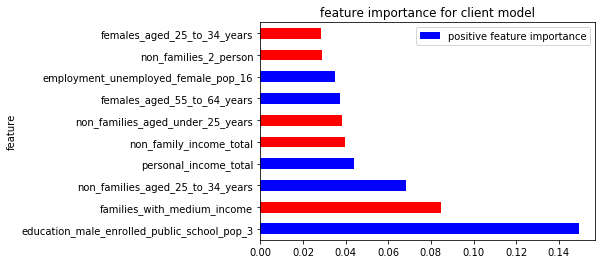

In [0]:
client_feature_importance = pd.read_csv('/content/drive/My Drive/NYL_data/client_feature_importance.csv').head(10)
client_feature_importance['feature'] = [x.replace('population_','') for x in list(client_feature_importance['feature'])]
client_feature_importance['value'] = [1,0,1,1,0,0,1,1,0,0]
client_feature_importance['positive feature importance'] = client_feature_importance['feature_importance']
ax = client_feature_importance[:10].plot.barh(x='feature', y='positive feature importance', rot=0,title = 'feature importance for client model',color=client_feature_importance.value.map({1: 'blue', 0: 'r'}))
fig = ax.get_figure()
fig.savefig('revenue_model_feature',dpi=30)

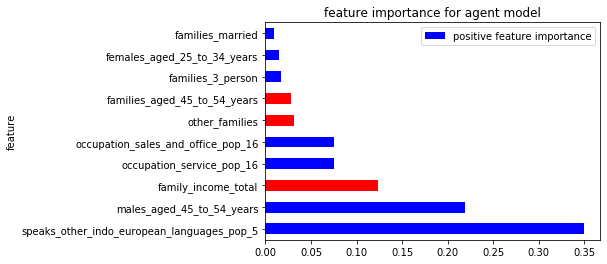

In [0]:
agent_feature_importance = pd.read_csv('/content/drive/My Drive/NYL_data/agent_feature_importance.csv').head(10)
agent_feature_importance['feature'] = [x.replace('population_','') for x in list(agent_feature_importance['feature'])]
agent_feature_importance['value'] = [1,1,0,1,1,0,0,1,1,1]
agent_feature_importance['positive feature importance'] = agent_feature_importance['feature_importance']
fig = ax.get_figure()
agent_feature_importance[:10].plot.barh(x='feature', y='positive feature importance', rot=0,title = 'feature importance for agent model',color=agent_feature_importance.value.map({1: 'b', 0: 'r'}))

In [0]:
client_feature_importance = pd.read_csv('/content/drive/My Drive/NYL_data/feature_importance_client.csv')
client_feature_importance['feature'] = [x.replace('population','') for x in list(client_feature_importance['feature'])]
client_feature_importance[:10].plot.barh(x='feature', y='feature_importance', rot=0,title = 'feature importance for revenue prediction')

# Similarity method

In [0]:
matured_counties.shape

(431, 1)

In [0]:
agents_census_tract = pd.read_csv('/content/drive/My Drive/NYL_data/agent_result.csv')
clients_census_tract = pd.read_csv('/content/drive/My Drive/NYL_data/predicted revenue',index_col = 0)
pop_df = pd.read_csv('/content/drive/My Drive/NYL_data/masterdemographics.csv',usecols=['masterdemographics.easi_census_tract','masterdemographics.population_1_1_2022'])
matured_counties = pd.read_csv('/content/drive/My Drive/NYL_data/matured_counties_scz.csv',index_col = 0)
clients_df = pd.read_csv('/content/drive/My Drive/NYL_data/nyu_capstone_client.csv',usecols = ['County_sales','life_sales_low_premium','life_sales_medium_premium','life_sales_high_premium','annuities'])
agents_df = pd.read_csv('/content/drive/My Drive/NYL_data/nyu_capstone_agent.csv')
pop_county = pd.read_csv('/content/drive/My Drive/NYL_data/masterdemographics_county.csv',usecols=['masterdemographics.county_fips_code','masterdemographics.population_1_1_2017'])

In [0]:
pop_df['masterdemographics.easi_census_tract'] = pop_df['masterdemographics.easi_census_tract'].astype(int)
pop_df['masterdemographics.easi_census_tract'] = pop_df['masterdemographics.easi_census_tract']/100
pop_df['masterdemographics.easi_census_tract'] = pop_df['masterdemographics.easi_census_tract'].astype(int)
pop_df['masterdemographics.easi_census_tract'] = pop_df['masterdemographics.easi_census_tract'].astype(str)
pop_df['masterdemographics.easi_census_tract'] = [x.zfill(11) for x in pop_df['masterdemographics.easi_census_tract']]
# pop_df['masterdemographics.easi_census_tract'] = pop_df['masterdemographics.easi_census_tract'].astype(int)

In [0]:
pop_census_tract = pop_df.groupby(by = 'masterdemographics.easi_census_tract').sum()

In [0]:
agents_census_tract['easi_census_tract'] = [x.zfill(11) for x in agents_census_tract['easi_census_tract'].astype(str)]

In [0]:
clients_census_tract['cencus_tract'] = [x.zfill(11) for x in clients_census_tract['cencus_tract'].astype(str)]

In [0]:
df = pd.merge(agents_census_tract,clients_census_tract, how = 'left', left_on='easi_census_tract',right_on = 'cencus_tract')

In [0]:
df.shape

(14103, 5)

In [0]:
df = df.drop(['cencus_tract'],axis = 1)
df = df[['easi_census_tract','preds_good','predicted_sales','county']]
df['easi_census_tract'] = df['easi_census_tract'].apply(str)
df = pd.merge(df,pop_census_tract,how = 'left',left_on='easi_census_tract',right_on = 'masterdemographics.easi_census_tract')

### Get top matured markets to set as centriods

In [0]:
clients_df = clients_df.fillna(0)
clients_df['revenue'] = 500*clients_df['life_sales_low_premium'] + 5000*clients_df['life_sales_medium_premium'] + 10000* clients_df['life_sales_high_premium'] + 1000*clients_df['annuities']

In [0]:
pop_county = pop_county[51:]

a=pop_county['masterdemographics.county_fips_code'].apply(str).apply(len) == 4
'0' +pop_county['masterdemographics.county_fips_code'].apply(str)
pop_county.loc[a,'masterdemographics.county_fips_code']= '0' + pop_county['masterdemographics.county_fips_code'].apply(str)

In [0]:
matured_centriods = pd.merge(matured_counties,clients_df,how='left',left_on='Matured_counties',right_on='County_sales')

matured_centriods = matured_centriods.dropna(axis='rows')

matured_centriods = matured_centriods[['Matured_counties','revenue']]

b = matured_centriods['Matured_counties'].apply(str).apply(len) == 4
matured_centriods.loc[b,'Matured_counties'] = '0' + matured_centriods['Matured_counties'].apply(str)

matured_centriods = pd.merge(matured_centriods,pop_county,how = 'left',left_on='Matured_counties',right_on='masterdemographics.county_fips_code')

matured_centriods = matured_centriods.drop(['masterdemographics.county_fips_code'],axis = 1)

matured_centriods['rvn_per_cap'] = matured_centriods['revenue']/matured_centriods['masterdemographics.population_1_1_2017']

k = 10

top_matured = matured_centriods.sort_values('rvn_per_cap',ascending=False)[:k]

In [0]:
agents_count_by_county =agents_df['Agents_county_of_residence'].value_counts()
agents_per_county = pd.DataFrame({'County_ID':pd.Series(agents_count_by_county.index.astype(int)),'Agent_counts':pd.Series(agents_count_by_county.values)})

c = agents_per_county['County_ID'].apply(str).apply(len) ==4
agents_per_county.loc[c,'County_ID'] = '0' + agents_per_county['County_ID'].apply(str)

top_matured = pd.merge(top_matured,agents_per_county,how = 'left',left_on='Matured_counties',right_on='County_ID')

top_matured = top_matured.fillna(0)
top_matured = top_matured.drop(['County_ID'],axis =1)

In [0]:
df_scaled = df.drop('county',axis = 1)
deno = np.sqrt(df_scaled['preds_good']**2 + df_scaled['predicted_sales']**2 + df_scaled['masterdemographics.population_1_1_2022']**2)
df_scaled['preds_good'] = df_scaled['preds_good'] / deno
df_scaled['predicted_sales'] = df_scaled['predicted_sales']/deno
df_scaled['masterdemographics.population_1_1_2022'] = df_scaled['masterdemographics.population_1_1_2022']/deno
df_scaled.head(3)

,easi_census_tract,preds_good,predicted_sales,masterdemographics.population_1_1_2022
0,01001020100,0.000002,0.999920,0.012648
1,01001020200,0.000002,0.999938,0.011153
2,01001020300,0.000002,0.999764,0.021729


In [0]:
scaled_top = top_matured.drop(['rvn_per_cap','Matured_counties'],axis =1)
bot = np.sqrt(scaled_top['revenue']**2 + scaled_top['masterdemographics.population_1_1_2017']**2 + scaled_top['Agent_counts']**2)
scaled_top['revenue'] = scaled_top['revenue']/ bot
scaled_top['masterdemographics.population_1_1_2017'] = scaled_top['masterdemographics.population_1_1_2017']/ bot
scaled_top['Agent_counts'] = scaled_top['Agent_counts']/ bot
cols = ['Agent_counts','revenue','masterdemographics.population_1_1_2017']
scaled_top = scaled_top[cols]
scaled_top.head(k)

,Agent_counts,revenue,masterdemographics.population_1_1_2017
0,0.000000e+00,0.999970,0.007770
1,0.000000e+00,0.999877,0.015657
2,0.000000e+00,0.999848,0.017433
3,1.386374e-07,0.999818,0.019076
4,0.000000e+00,0.999765,0.021659
5,3.699914e-08,0.999643,0.026723
6,0.000000e+00,0.999641,0.026787
7,0.000000e+00,0.999623,0.027439
8,0.000000e+00,0.999446,0.033267
9,0.000000e+00,0.999323,0.036788


In [0]:
from sklearn.metrics import pairwise_distances
vec_df = df_scaled.iloc[:,1:] #this is our prediction
simi = pairwise_distances(vec_df.fillna(0),scaled_top)
result = pd.DataFrame(simi,index = df_scaled['easi_census_tract'])

In [0]:
result = result.apply(lambda x: 1-x)
result['county'] = [str(x)[:5] for x in list(result.index)]
result = pd.merge(result,pop_census_tract,left_index = True,right_on = 'masterdemographics.easi_census_tract')
result.columns = ['top1','top2','top3','top4','top5','top6','top7','top8','top9','top10','county','population']
counties = np.unique(result.county)
county_score = pd.DataFrame(columns = ['county','score'])
county_score['county'] = counties
for county in counties:
  county_df = result.loc[result.county == county,['top1','county','population']]
  county_score.loc[county_score.county == county,'score'] = np.dot(county_df.top1 ,county_df.population)
county_score = county_score.sort_values('score',ascending=False)

In [0]:
! pip install dbfread
! pip install geopandas
! pip install simpledbf

     |████████████████████████████████| 921kB 4.9MB/s 
     |████████████████████████████████| 10.1MB 24.4MB/s 
     |████████████████████████████████| 11.8MB 36.1MB/s 
  Created wheel for simpledbf: filename=simpledbf-0.2.6-cp36-none-any.whl size=13793 sha256=8cd231f60b4a91371900eefdb93bcecfb7266832a0ef4a38603b0435c5b12da5
  Stored in directory: /root/.cache/pip/wheels/72/dd/df/cdfb970a508ef9750ebb4b6e035a3410c3d62b5a6a91d2aafc
Successfully built simpledbf


In [0]:
from dbfread import DBF
import pandas as pd
import geopandas as gpd
from simpledbf import Dbf5
import matplotlib.pyplot as plt
import descartes
from shapely.geometry import Point, Polygon

In [0]:
county_shape = gpd.read_file('/content/drive/My Drive/1006Capstone-NYLife/tl_2018_us_county/tl_2018_us_county.shp')

In [0]:
county_shape ['INTPTLAT'] = county_shape ['INTPTLAT'].astype(float)
county_shape ['INTPTLON'] = county_shape ['INTPTLON'].astype(float)
county_shape_mainland = county_shape [(county_shape ['INTPTLAT'] > 25) & (county_shape ['INTPTLAT'] < 50) 
                                 &(county_shape ['INTPTLON'] > -140)& (county_shape ['INTPTLON'] < -60) ]

In [0]:
county_shape_mainland = pd.merge(county_shape_mainland,county_score, left_on = 'GEOID',right_on = 'county',how = 'left')

In [0]:
county_shape_mainland[['county','score']] = county_shape_mainland[['county','score']].fillna(0)

In [0]:
SCZ_counties = pd.read_csv('/content/drive/My Drive/NYL_data/south_central_zone_sm.csv')

In [0]:
scz_county = [str(x).zfill(5) for x in SCZ_counties.FIPS.astype(int)]
SCZ_counties = pd.read_csv('/content/drive/My Drive/NYL_data/south_central_zone_sm.csv')
#county_shape_mainland['GEOID'] = county_shape_mainland['GEOID'].astype(int)
county_shape_mainland['GEOstr'] = [x.zfill(5) for x in county_shape_mainland['GEOID'].astype(str)]
county_shape_mainland['SCZ'] = [x in scz_county for x in county_shape_mainland.GEOstr]

In [0]:
scz_shape = county_shape_mainland.loc[county_shape_mainland.SCZ == 1]
top_1 = county_shape_mainland.loc[county_shape_mainland.GEOID == '13075']

In [0]:
GO_office = gpd.read_file('/content/drive/My Drive/1006Capstone-NYLife/GO_Addr_v081017_enc/GO_Addr_v081017.shp')
Sales_office = gpd.read_file('/content/drive/My Drive/1006Capstone-NYLife//SLS_Addr_v081017_enc/SLS_Addr_v081017.shp')
GO_office = GO_office[GO_office.ST_CD != 'AK']
GO_office = GO_office[GO_office.ST_CD != 'HI']

In [0]:
SCZ_office = pd.read_csv('/content/drive/My Drive/NYL_data/office_concat_countyID_filled.csv')
SCZ_office = SCZ_office.loc[[x in list(SCZ_counties.FIPS) for x in list(SCZ_office.countyID)]]
SCZ_Sales_office_shape = Sales_office.loc[[x in list(SCZ_office.OU_CD) for x in list(Sales_office.OU_CD)]]
SCZ_GO_office_shape = GO_office.loc[[x in list(SCZ_office.OU_CD) for x in list(GO_office.OU_CD)]]

In [0]:
state = gpd.read_file('/content/drive/My Drive/NYL_data/state_shape_file/cb_2018_us_state_500k.shp')
state = state.loc[[x in ['12','13','18','21','24','26','28','37','39','45','47','51','54','01'] for x in state.STATEFP]]
state['coords'] = state['geometry'].apply(lambda x: x.representative_point().coords[:])
state['coords'] = [coords[0] for coords in state['coords']]

In [0]:
suggested_county = ['12071','37081','12115','12083','37063','26065','12001','37021','37129']
#suggested_county = ['12083','12001','12071','37081','12115']
suggested_office = county_shape_mainland.loc[[x in suggested_county for x in list(county_shape_mainland.GEOID)]]

In [0]:
!pip install mapclassify
import mapclassify

  Created wheel for mapclassify: filename=mapclassify-2.1.1-cp36-none-any.whl size=29001 sha256=ed6d356f1f7089b7212a9df33dc289a61fd93b1f8011c46e9cac32516241ecdf
  Stored in directory: /root/.cache/pip/wheels/fc/b8/58/56b650743289cbecb476ef1fc50ab0aeaa0b12e56ad912d624
Successfully built mapclassify


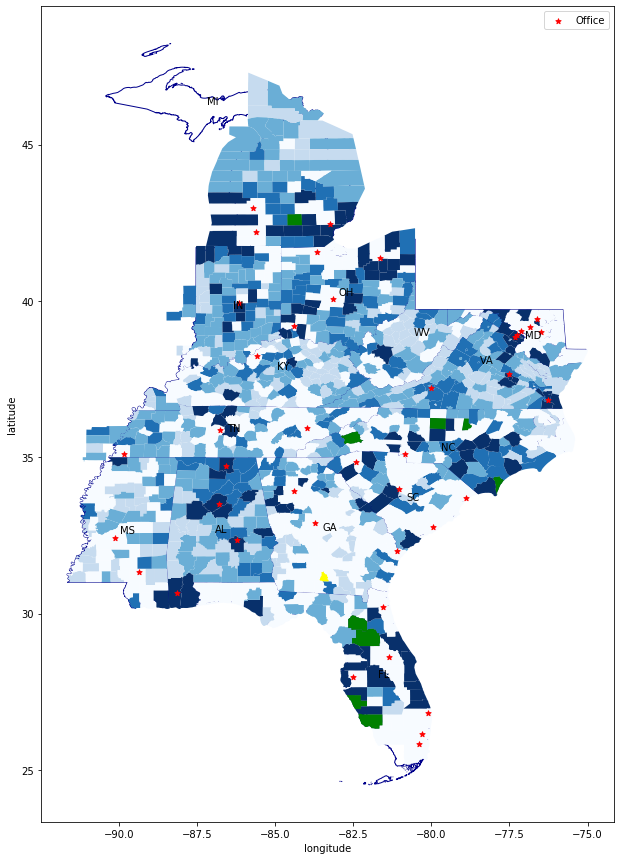

In [0]:
variable = 'score'
# set the range for the choropleth
vmin, vmax = 120, 220
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(15, 15))
state.plot(ax = ax,color='white',lw =1,edgecolor = 'darkblue')
for idx, row in state.iterrows():
    plt.annotate(s=row['STUSPS'], xy=row['coords'],
                 horizontalalignment='center')
scz_shape.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor=None, scheme = 'boxplot')

SCZ_GO_office_shape.plot(ax = ax,marker='*', color='red', markersize=30,label = 'Office',legend = True)
SCZ_Sales_office_shape.plot(ax = ax,marker='*', color='red', markersize=30,legend = True)
top_1.plot(ax = ax,color = 'yellow',label = 'mostekwbdjewk',legend = True)
suggested_office.plot(ax = ax,color = 'green')
plt.xlabel('longitude')
plt.ylabel('latitude')
leg = ax.legend()
fig = ax.get_figure()
fig.savefig('prediction')

In [0]:
office_county = pd.read_csv('/content/drive/My Drive/NYL_data/office_concat_countyID_filled.csv')
office_county = [str(x).zfill(5) for x in office_county.countyID]

In [0]:
scz_shape = scz_shape.loc[[x not in office_county for x in list(scz_shape.GEOstr)]]

In [0]:
top_1['coords'] = top_1['geometry'].apply(lambda x: x.representative_point().coords[:])
top_1['geometry'] = [(-83.42938779854369, 31.1888135)]
#top_1['coords'] = [coords[0] for coords in top_counties['coords']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
offices = pd.concat([GO_office,Sales_office])
offices = offices.reset_index()

In [0]:
county_score = county_score.sort_values('score',ascending=False)

In [0]:
top_5_county = county_score['county'][:50]
top_counties = scz_shape.loc[[x in list(top_5_county) for x in list(scz_shape.GEOID)]]

In [0]:
offices['coords'] = offices['geometry'].apply(lambda x: x.representative_point().coords[:])
offices['coords'] = [coords[0] for coords in offices['coords']]
top_counties['coords'] = top_counties['geometry'].apply(lambda x: x.representative_point().coords[:])
top_counties['coords'] = [coords[0] for coords in top_counties['coords']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [0]:
distance_result = pd.DataFrame(columns = ['county'] + list(offices.OU_CD.values))
distance_result['county'] = top_5_county

In [0]:
import geopy.distance
for top_county in top_5_county:
  for i in range(offices.shape[0]):
    coords_1 = offices.loc[i,['coords']]
    office = offices.loc[i,'OU_CD']
    coords_2 = top_counties.loc[top_counties.GEOID == top_county,['coords']]
    try:
      distance_result.loc[distance_result.county == top_county,office] = geopy.distance.vincenty(coords_1.values[0][::-1], coords_2.values[0][0][::-1]).miles
    except:
      continue

In [0]:
distance_result
a =distance_result.drop(['county'],1)
a.min(1)

402     16.293440
683           NaN
94      15.921694
215     11.052506
381     22.611843
86     103.148508
607     21.240885
95      46.051040
36            NaN
345     10.048711
75      45.029353
574     18.754491
559     38.335743
103     31.411766
477     80.388849
93      25.426976
211     23.139442
727     11.444581
784     13.068809
48            NaN
98      55.458016
707     24.584093
573     42.338965
401     33.600511
523     19.462485
89      37.281575
44            NaN
90      59.070554
675     19.064818
279     62.121690
470     93.119222
697           NaN
645     20.140539
473    103.438475
552     27.547824
597     23.988779
97      43.578576
368     58.046095
590     15.219591
236     54.422353
72      60.098019
459     54.363408
773           NaN
661      8.638535
754      9.159201
779      9.038825
548     41.829572
128     22.380937
50            NaN
492     64.572080
dtype: float64